In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar

#Carros en un plano inclinado


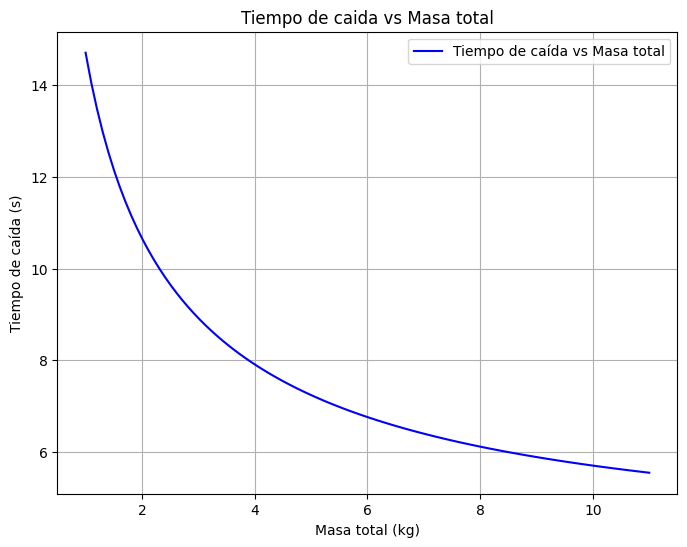

In [25]:
method = "Radau"
g = 9.81
angulo = np.radians(30)
friccion = 0.7
masa_carro = 1.0
Altura = 10.0
y0=np.array([0.,Altura,0.,0.])
# Ecuaciones diferenciales
def ecuaciones(t, Y,M,angulo=angulo,masa_carro=masa_carro,g=g,friccion=friccion):
    masa_total=M+masa_carro
    x,y,vx,vy = Y
    v=np.hypot(vx,vy)
    v=v+1e-10
    return np.array([
        vx,
        vy,
        -friccion * v * vx / masa_total + g * np.sin(angulo),
        -g + g * np.cos(angulo) + (-friccion * v * vy) / masa_total
    ])
def stop(t,Y,args):
    x,y,vx,vy = Y
    return y
stop.terminal = True
stop.direction = -1

t_span = (0,100)

def t_caida(M, H=Altura,t_span=t_span,y0=y0):
    args = [M]
      # posición en la dirección del plano inclinado y velocidad inicial
    sol = solve_ivp(ecuaciones, t_span, y0,events=stop, args=(args), method=method, dense_output=True)

    t_vals = sol.t
    y_vals = sol.y[0]
    tiempo_caida = np.interp(0, y_vals[::-1], t_vals[::-1])
    return tiempo_caida
Masa_variante = np.linspace(0, 10, 100)  # masas adicionales en kg
tiempos_caida = [t_caida(M) for M in Masa_variante]

# Graficamos el resultado
plt.figure(figsize=(8, 6))
plt.plot(masa_carro + Masa_variante, tiempos_caida, label="Tiempo de caída vs Masa total", color="blue")
plt.xlabel("Masa total (kg)")
plt.ylabel("Tiempo de caída (s)")
plt.title("Tiempo de caida vs Masa total")
plt.grid(True)
plt.legend()
plt.show()

#¿El tiempo de caída de los carros depende de la masa que llevan encima?


En efecto, el tiempo de caída de los carros depende de la masa que llevan encima, esto se debe a que con mayor masa, la desaceleración que ejerce la fricción se vuelve muy pequeña, haciendo que se llegue en un menor tiempo al punto en el que la altura es cero.

# Comprobación observacional de la relatividad general

In [2]:
# Constantes
mu = 39.4234021
alpha = 1.09778201e-8
a = 0.38709893
e = 0.20563069

In [3]:
# Condiciones iniciales
x0 = a*(1+e)
y0 = 0
vx0 = 0
vy0 = np.sqrt((mu/a)*((1-e)/(1+e)))

cond_iniciales = [x0, y0, vx0, vy0]

In [4]:
# Función para calcular la aceleración
def aceleracion(t, r):
    x, y, vx, vy = r
    r2 = x**2+y**2
    r_norm = np.sqrt(r2)

    ax = -mu*(x/r_norm**3)*(1+alpha/(r2))
    ay = -mu*(y/r_norm**3)*(1+alpha/(r2))

    return [vx, vy, ax, ay]

In [10]:
# Resuelve la ecuacion diferncial
sol = solve_ivp(aceleracion, (0,10), cond_iniciales, t_eval=np.linspace(0,10,20000), method='RK45', max_step=1.0e-4)


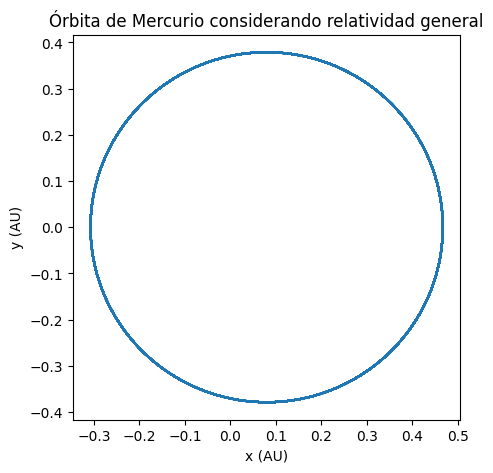

In [11]:
# Graficar la orbita de Mercurio
plt.figure(figsize=(5, 5))
plt.plot(sol.y[0], sol.y[1])
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.title("Órbita de Mercurio considerando relatividad general")
plt.show()

In [12]:
# Extraer resultados
x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]
t = sol.t

In [13]:
# Producto punto r(t) · v(t)
producto_punto = x*vx + y*vy

# Puntos donde r(t) · v(t) = 0 (perihelio o afelio)
perihelio_indices = np.where(np.diff(np.sign(producto_punto)))[0]

# Calcular el angulo del vector de posicion
angulos = np.arctan2(y[perihelio_indices], x[perihelio_indices])

# Ajustar los angulos
angulos = np.mod(angulos, 2*np.pi)

# Convertir angulos a grados
angulos_grados = np.degrees(angulos)

# Convertir grados a segundos de arco
angulos_arcsec = angulos_grados * 3600

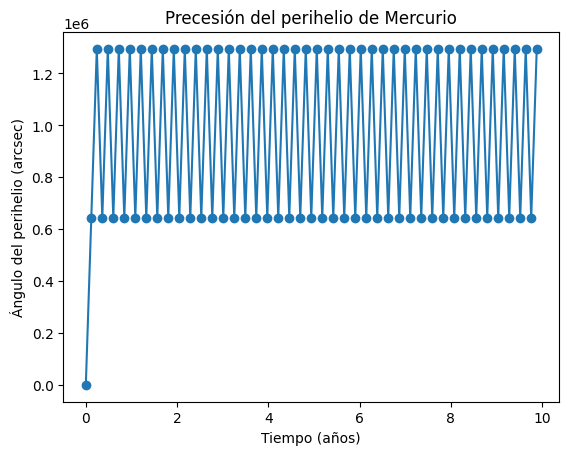

In [14]:
# Graficar el angulo del perihelio en función del tiempo
plt.plot(t[perihelio_indices], angulos_arcsec, 'o-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Ángulo del perihelio (arcsec)')
plt.title('Precesión del perihelio de Mercurio')
plt.show()

# Cuantización de la energía

In [15]:
# Define el sistema de ecuaciones diferenciales
def schrodinger(x, y, E):
    f, fp = y
    fpp = (x**2 - 2*E) * f
    return [fp, fpp]

In [16]:
# Soluciona el sistema para un valor dado de E y condiciones iniciales
def solucion_schrodinger(E, ini_condiciones, x_span=[0, 6]):
    sol = solve_ivp(schrodinger, x_span, ini_condiciones, args=(E,), dense_output=True)
    return sol

In [17]:
# Define la función objetivo para el método de disparo
def funcion_objetivo_sim(E):
    sol = solucion_schrodinger(E, ini_condi_simetrico)
    f_xmax = sol.y[0, -1]
    return f_xmax

def funcion_objetivo_asim(E):
    sol = solucion_schrodinger(E, ini_condi_antisimetrico)
    f_xmax = sol.y[0, -1]
    return f_xmax

In [18]:
# Encuentra las energías propias usando el método de búsqueda de raíces
def encontrar_energias(func_objetivo, E_vals):
    energias = []
    for i in range(len(E_vals)-1):
        E1, E2 = E_vals[i], E_vals[i+1]
        f1, f2 = func_objetivo(E1), func_objetivo(E2)
        if f1 * f2 < 0:
            sol = root_scalar(func_objetivo, bracket=[E1, E2], method='brentq')
            if sol.converged:
                print(f"Energía encontrada: {sol.root:.4f}")
                energias.append(sol.root)
    return energias

In [19]:
# Condiciones iniciales para formas simétrica y antisimétrica
ini_condi_simetrico = [1, 0]
ini_condi_antisimetrico = [0, 1]


E_aprox = np.linspace(0, 10, 500)

In [20]:
# Busca las energías para la forma simétrica
energias_validas_sim = encontrar_energias(funcion_objetivo_sim, E_aprox)

# Busca las energías para la forma antisimétrica
energias_validas_asim = encontrar_energias(funcion_objetivo_asim, E_aprox)

Energía encontrada: 0.5000
Energía encontrada: 2.4995
Energía encontrada: 4.4991
Energía encontrada: 6.4986
Energía encontrada: 8.4981
Energía encontrada: 1.4997
Energía encontrada: 3.4993
Energía encontrada: 5.4989
Energía encontrada: 7.4984
Energía encontrada: 9.4978


In [21]:
# Genera los valores de x para evaluar la solución
x_vals = np.linspace(0, 6, 500)

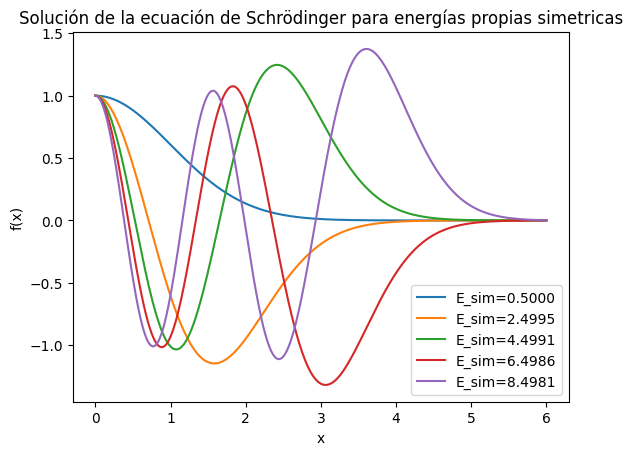

In [22]:
# Grafica las soluciones simétricas
if energias_validas_sim:
    for E in energias_validas_sim[:5]:
        sol_sim = solucion_schrodinger(E, ini_condi_simetrico, x_span=[0, 6])
        f_sim = sol_sim.sol(x_vals)[0]
        plt.plot(x_vals, f_sim, label=f'E_sim={E:.4f}')
plt.title('Solución de la ecuación de Schrödinger para energías propias simetricas')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

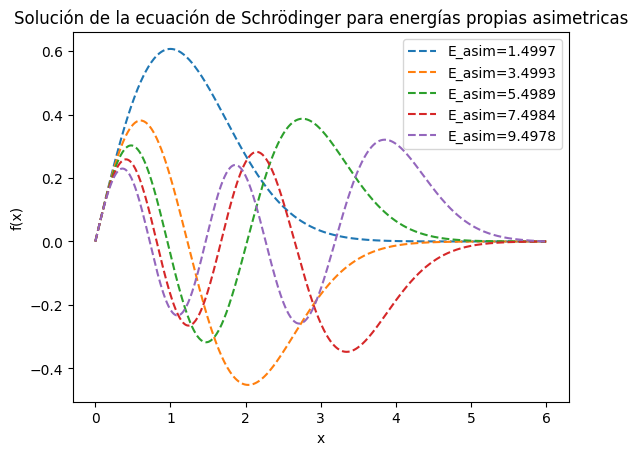

In [23]:
# Grafica las soluciones antisimétricas
if energias_validas_asim:
    for E in energias_validas_asim[:5]:
        sol_asim = solucion_schrodinger(E, ini_condi_antisimetrico, x_span=[0, 6])
        f_asim = sol_asim.sol(x_vals)[0]
        plt.plot(x_vals, f_asim, '--', label=f'E_asim={E:.4f}')
plt.title('Solución de la ecuación de Schrödinger para energías propias asimetricas')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [24]:
# Imprime las energías válidas encontradas
print("Energías válidas para la forma simétrica: ", [round(E, 4) for E in energias_validas_sim[:5]])
print("Energías válidas para la forma antisimétrica: ", [round(E, 4) for E in energias_validas_asim[:5]])

Energías válidas para la forma simétrica:  [0.5, 2.4995, 4.4991, 6.4986, 8.4981]
Energías válidas para la forma antisimétrica:  [1.4997, 3.4993, 5.4989, 7.4984, 9.4978]
